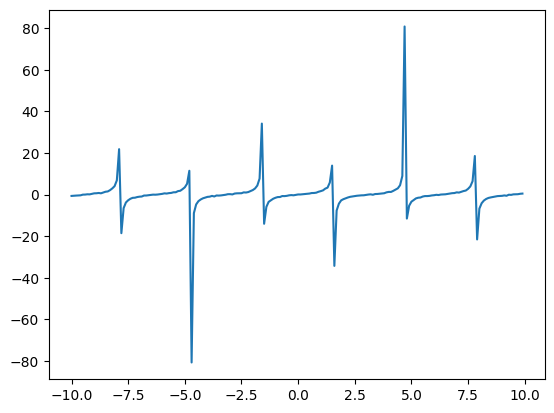

In [ ]:
import numpy as np
from RNN import *
import matplotlib.pyplot as plt

x=np.arange(-10,10,0.1)
x = x.reshape(len(x),1)
y = np.tan(x)+0.1*np.random.randn(len(x),1)

plt.plot(x,y)
plt.show()

In [2]:
r = RNN(500,x)
r.forward(Tanh)
print(r.y_pred.shape,x.shape,r.H[0].shape,r.Wh.shape,r.Wx.shape,r.Wy.shape)

(200, 1) (200, 1) (500, 1) (500, 500) (500, 1) (1, 500)


Loss : 46.7203 
Loss : 46.1662 
Loss : 45.2237 
Loss : 45.9461 
Loss : 46.0244 
Loss : 45.0839 
Loss : 45.0414 
Loss : 44.9755 
Loss : 45.9992 
Loss : 44.6791 
Loss : 43.2996 
Loss : 43.512 
Loss : 42.2181 
Loss : 45.5074 
Loss : 43.4658 
Loss : 42.1917 
Loss : 41.8375 
Loss : 43.903 
Loss : 41.226 
Loss : 45.6606 
Loss : 43.3501 
Loss : 41.9324 
Loss : 43.9482 
Loss : 43.538 
Loss : 42.2099 
Loss : 43.073 
Loss : 43.8431 
Loss : 41.6365 
Loss : 40.8073 
Loss : 39.8826 
Loss : 42.9346 
Loss : 44.303 
Loss : 38.9884 
Loss : 40.966 
Loss : 38.9619 
Loss : 38.0589 
Loss : 41.766 
Loss : 42.0238 
Loss : 36.7472 
Loss : 37.9697 
Loss : 35.3656 
Loss : 39.5981 
Loss : 39.9129 
Loss : 34.2173 
Loss : 38.6016 
Loss : 41.1667 
Loss : 41.7198 
Loss : 41.9222 
Loss : 39.1478 
Loss : 36.2982 
Loss : 40.1382 
Loss : 37.2106 
Loss : 44.5385 
Loss : 36.3691 
Loss : 40.7522 
Loss : 38.1842 
Loss : 43.0718 
Loss : 42.4948 
Loss : 38.0117 
Loss : 41.8488 
Loss : 40.2932 
Loss : 40.7062 
Loss : 40.518 
L

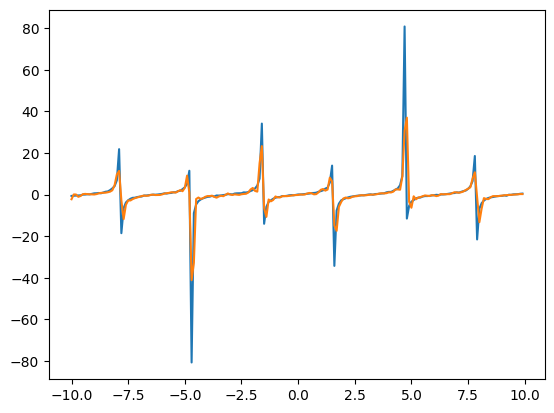

In [3]:
r = RNN(500,x)
opt = SGD_Optimizer(learning_rate=1e-4, decay=0.001, momentum=0.99)

for i in range(10000):
    r.forward(Tanh)
    y_hat = r.y_pred
    t=r.T
    H=r.H

    dy = y_hat - y
    L = np.round(0.5*np.dot(dy.T,dy)/t,4)
    
    if i%100 == 0:
        print(f'Loss : {L[0][0]} ')

    r.backward(dy)
    opt.pre_update()
    opt.parameter_update(r)
    opt.post_update()

plt.plot(x,y)
plt.plot(x,y_hat)
plt.show()